<a href="https://colab.research.google.com/github/BDR2939/Advanced-statistics/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 3
#### Topics:
- Statistical Estimation
- Hypothesis Testing in one and two samples
- ANOVA

#### Due: 23/05/2023 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: Roni Ben Dom

**Date**: 21/05/2023

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (Correlated Data)

Suppose that $Y_1,\ldots,Y_n$ has each mean $\mu$ and variance $\sigma^2$, but 
$$
\rho_{ij} := \mathrm{Corr}(Y_i,Y_j) = \begin{cases}
1 & i=j \\
\rho & |i-j| = 1 \\
0 & |i-j| > 1
\end{cases}.
$$
This situation arise when an observation $i$ may depend to some extent on only the previous observation’s white noise: an one-lag "holdeover effect". This is also known as the "lag-1 moving average" model (MA(1)). 

1. Show that:
  - $$\mathrm{Var}(\bar{Y}) = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$
Namely, positive correlation increases varaince. Hint: use that $\mathrm{Var}(U+V) = \mathrm{Var}(U) + \mathrm{Var}(V) + 2 \mathrm{Cov}(U,V)$ and induction or recursive computation over $n$. Another option is to write $Y = \Sigma^{1/2}Z$ where $Z\sim \Ncal(0,I)$ and $\Sigma^{1/2}$ is symmetric with  $\Sigma^{1/2}\Sigma^{1/2} = \Sigma$ has the desired covariance stracture.  

  - $$\qquad \ex[{s^2}] = \sigma^2(1 - 2\rho/n)$$
  where $s^2$ is the standard varince estiamte. 
Namely, with positive correlation the "variety" in the data is smaller. 

  - **(Bonus)** The t-statistic statisfies
$$
t = \sqrt{n} \frac{\bar{Y}-\mu}{s} \to \Ncal(0,1 + 2 \rho),\quad n \to \infty
$$
Hint: you may use the following version of Slutsky's Theorem: for two sequences of RV $U_n$ and $V_n$, if $U_n \overset{D}{\to} U$ and $V_n \overset{p}{\to} c$ (constant), then $V_n U_n \overset{D}{\to} cU$
2. Verify your answer to the first two items in 1 using simulations. Use `nMonte = 10000` problem instances. In each instance, use a sample size of `n = 10` with $\sigma=1$ and $\rho \in \{\pm 0.1, \pm 0.3, \pm0.5\}$. The function `genrate_correlated_data` below generates noramlly distributed data satisfying the correlation model above. 

3. Suppose $\rho>0$
 - Derive a $1-\alpha$ confidence interval based on $s$ and the $t$-distribution with $n-1$ DoF. Does your interval 
 contain the value of $\mu$ more or less often than $1-\alpha$? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 
 - Suppose that we reject $H_0\,:\,\mu = \mu_0$ whenever $|t|$ exceeds the critical value $t_{n-1}^{1-\alpha/2}$. Would our P-value be too small or too large? Would we reject more or less often then $\alpha$ if the null $\mu = \mu_0$ is true? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 
 - Would your answer to the preivous two items change if $\rho < 0$? how?

The point: correlation in our data is bad because it makes us make wrong descisions. The effect of correlation is much worst than non-nomrality since the latter diminishes with $n$ due to the CLT. 


In [1]:
import numpy as np
def genrate_correlated_data(n: int, rho: float, mu: float, sigma: float) -> np.ndarray:
    """
    Generate samples from the model:
    Yi ~ N(mu, sigma^2) and Corr(Yi,Yj) = ( i == j ) + rho * ( abs( i - j ) == 1 )
    
    Args:
    -----
    :n:     sample size
    :rho:   desired one lag correlation between samples
    :mu:    mean
    :sigma: standard deviation
    
    """
    assert sigma > 0
    
    # build desired covariance matrix
    Sig = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i==j : 
                Sig[i,j] = 1
            if np.abs(i-j) == 1:
                Sig[i,j] = rho
                Sig[j,i] = rho
                
    # get matrix square root of covariance matrix:
    Sig_sqrt = np.linalg.cholesky(sigma**2 * Sig)
    
    # sample from the standard normal dist. and transform 
    # so that the result is a normal vector with the desired 
    # covaraince structure
    return mu + Sig_sqrt @ np.random.randn(n)


1. 

 - Proof by induction:<br>
  First lets prove for $n = 1$:<br>
  $\operatorname{Var}\left(\bar{Y}\right) = \operatorname{Var}\left(Y_{1}\right) \underbrace{=}_{\text{by definition}} \sigma^{2} = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n}) = \frac{\sigma^2}{1}(1+ 2\rho \frac{0}{1}) =  \sigma^2$

    Now assume it exists for n  and prove for n+1:<br>
    $\displaystyle{ \operatorname{Var}\left(\bar{Y}\right) = \operatorname{Var}\left(\frac{1}{n+1}\sum_{i=1}^{n+1}Y_{i}\right) = \operatorname{Var}\left(\frac{n}{n+1}\frac{1}{n}\sum_{i=1}^{n+1}Y_{i}\right) = \left(\frac{n}{n+1}\right)^{2} \operatorname{Var}\left(\frac{1}{n}\sum_{i=1}^{n+1}Y_{i}\right) = \left(\frac{n}{n+1}\right)^{2} \operatorname{Var}\left(\frac{1}{n}\sum_{i=1}^{n}Y_{i} + \frac{1}{n}Y_{n+1}\right) = \left(\frac{n}{n+1}\right)^{2}\left[\operatorname{Var}\left(\frac{1}{n}\sum_{i=1}^{n}Y_{i}\right) +\operatorname{Var}\left(\frac{1}{n}Y_{n+1}\right) + 2\cdot\operatorname{Cov}\left(\frac{1}{n}\sum_{i=1}^{n}Y_{i}, \frac{1}{n}Y_{n+1}\right)\right] = \left(\frac{n}{n+1}\right)^{2}\left[\frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})+\frac{\sigma^{2}}{n^{2}} + 2\cdot\frac{1}{n^{2}}\sum_{i=1}^{n}\operatorname{Cov}\left(Y_{i}, Y_{n+1}\right)\right] = \left(\frac{n}{n+1}\right)^{2}\left[\frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})+\frac{\sigma^{2}}{n^{2}} + 2\cdot\frac{1}{n^{2}}\rho\sigma^{2}\right] =\frac{n\sigma^2\left(1+2\rho\frac{n-1}{n}\right)+\sigma^{2} + 2\rho\sigma^{2}}{\left(n+1\right)^{2}} = \frac{n\sigma^2 + 2\rho(n-1)\sigma^{2}+\sigma^{2} + 2\rho\sigma^{2}}{\left(n+1\right)^{2}} = \frac{\sigma^{2}\left(n + 2\rho(n-1)+1 + 2\rho\right)}{\left(n+1\right)^{2}} = \frac{\sigma^{2}\left(2\rho\cdot n + n + 1 \right)}{\left(n+1\right)^{2}} = \frac{\sigma^{2}}{n+1}\left[\frac{\left(2\rho\cdot n + n + 1 \right)}{n+1}\right] = \frac{\sigma^{2}}{n+1}\left[\frac{2\rho\cdot n}{n+1} + \frac{n + 1}{n+1}\right] = \frac{\sigma^{2}}{n+1}\left[\frac{2\rho\cdot n}{n+1} + 1\right]\blacksquare}$
  <br>
  <br>
  - $ \displaystyle{s^{2} = \frac{1}{n-1}\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}$

    $\displaystyle{\mathbb{E}\left(s^{2}\right) = \mathbb{E}\left(\frac{1}{n-1}\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}\right) = \frac{1}{n-1}\mathbb{E}\left(\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}\right) = \frac{1}{n-1}\mathbb{E}\left(\sum_{i=1}^{n}\left(y_{i}^{2}-2y_{i}\bar{y} + \bar{y}^{2}\right)\right) = \frac{1}{n-1}\mathbb{E}\left(\sum_{i=1}^{n}y_{i}^{2}-2\sum_{i=1}^{n}y_{i}\bar{y} + n\bar{y}^{2}\right) = \frac{1}{n-1}\left[\mathbb{E}\left(\sum_{i=1}^{n}y_{i}^{2}\right)-2\mathbb{E}\left(\sum_{i=1}^{n}y_{i}\bar{y}\right) + \mathbb{E}\left(n\bar{y}^{2}\right)\right] = \frac{1}{n-1}\left[\mathbb{E}\left(\sum_{i=1}^{n}y_{i}^{2}\right)-2\mathbb{E}\left(n\bar{y}^{2}\right) + \mathbb{E}\left(n\bar{y}^{2}\right)\right] = \frac{1}{n-1}\left[\mathbb{E}\left(\sum_{i=1}^{n}y_{i}^{2}\right)-2\mathbb{E}\left(n\bar{y}^{2}\right) + \mathbb{E}\left(n\bar{y}^{2}\right)\right] = \frac{1}{n-1}\left[\mathbb{E}\left(\sum_{i=1}^{n}y_{i}^{2}\right)-\mathbb{E}\left(n\bar{y}^{2}\right)\right] = \frac{1}{n-1}\left[\sum_{i=1}^{n}\mathbb{E}\left(y_{i}^{2}\right)-\mathbb{E}\left(n\bar{y}^{2}\right)\right] \underbrace{=}_{\operatorname{Var}\left(x\right) = \mathbb{E}\left(x^{2}\right) - \left[\mathbb{E}\left(x\right)\right]^{2} \Rightarrow \mathbb{E}\left(x^{2}\right) = \operatorname{Var}\left(x\right) + \left[\mathbb{E}\left(x\right)\right]^{2}} \frac{1}{n-1}\left[n\left(\sigma^{2} + \mu^{2}\right) - n\left(\frac{\sigma^2}{n}\left(1+ 2\rho \frac{n-1}{n}\right) + \mu^{2}\right)\right] = \frac{1}{n-1}\left[n\sigma^{2} + n\mu^{2} - \sigma^2\left(1+ 2\rho \frac{n-1}{n}\right) - n\mu^{2}\right] = \frac{1}{n-1}\left[n\sigma^{2} - \sigma^2\left(1+ 2\rho \frac{n-1}{n}\right)\right] = \frac{1}{n-1}\left[n\sigma^{2} - \sigma^2 - 2\rho\sigma^{2} \frac{n-1}{n}\right] = \frac{1}{n-1}\left[\sigma^{2}\left(n-1\right) - 2\rho\sigma^{2} \frac{n-1}{n}\right] = \sigma^{2} - \frac{2\rho\sigma^{2}}{n} = \sigma^{2}\left(1 - \frac{2\rho}{n}\right)\blacksquare }$

2. 

In [2]:
nMonte = 10000
n = 10 
mu, sigma = 0, 1
rhos = [-0.5, -0.3, -0.1, 0.1, 0.3, 0.5]

for rho in rhos:
  samples = [genrate_correlated_data(n, rho, mu, sigma) for i in range(nMonte)]

  samples_mean = [np.mean(sample) for sample in samples]
  var_y_bar = np.var(samples_mean)
  s_square = [np.sum((samples[i] - samples_mean[i]) ** 2) / (n - 1) for i in range(len(samples_mean))]
  s_square_mean = np.mean(s_square)

  var_y_bar_formula = (sigma**2 / n) * (1 + (2 * rho * (n-1) / n))
  s_square_mean_formula = sigma**2 * (1 - (2 * rho / n))

  print(f'For rho = {rho}\nvar Y bar = {var_y_bar}, var y bar formula = {var_y_bar_formula} \nE(s^{2}) = {s_square_mean}, E(s^{2}) formula = {s_square_mean_formula}\n')

For rho = -0.5
var Y bar = 0.010087377821182781, var y bar formula = 0.009999999999999998 
E(s^2) = 1.1040375496152652, E(s^2) formula = 1.1

For rho = -0.3
var Y bar = 0.045413378274426396, var y bar formula = 0.04600000000000001 
E(s^2) = 1.0574799817170462, E(s^2) formula = 1.06

For rho = -0.1
var Y bar = 0.08389466955494045, var y bar formula = 0.08200000000000002 
E(s^2) = 1.0148641332708774, E(s^2) formula = 1.02

For rho = 0.1
var Y bar = 0.11665499673616168, var y bar formula = 0.118 
E(s^2) = 0.9871245249795567, E(s^2) formula = 0.98

For rho = 0.3
var Y bar = 0.15343308456213556, var y bar formula = 0.15400000000000003 
E(s^2) = 0.9404822998700134, E(s^2) formula = 0.94

For rho = 0.5
var Y bar = 0.19263966310840766, var y bar formula = 0.19 
E(s^2) = 0.9053346120185847, E(s^2) formula = 0.9



3. 

In [3]:
from scipy import stats

def ex3(mu, sigma, n,nMonte, alpha, rho):
  in_CI_counter = 0
  abs_reject_counter = 0
  reject_counter = 0


  t_alpha_bar = stats.t.ppf(1 - (alpha / 2), df=n-1)

  for i in range(nMonte):
      samples = genrate_correlated_data(n, rho, mu, sigma)

      samples_mean = np.mean(samples)
      s_square = np.sum((samples - samples_mean) ** 2) / (n - 1)
      s = s_square ** 0.5

      l = samples_mean - (s / np.sqrt(n)) * t_alpha_bar
      u = samples_mean + (s / np.sqrt(n)) * t_alpha_bar

      if (l <= mu) and (mu <= u):
        in_CI_counter += 1

      t_statistic = (samples_mean - mu) / (s / n ** 0.5)

      if abs(t_statistic) > t_alpha_bar:
        abs_reject_counter += 1
      
      if t_statistic > t_alpha_bar:
        reject_counter += 1

  val = 'more' if (in_CI_counter * 100 / nMonte) > 95 else 'less'
  print(f'{in_CI_counter * 100 / nMonte}% out of the {nMonte} trials the real value of mu was in the confisence interval, {val} than the expected 95% of the trials')
  val = 'more' if (abs_reject_counter * 100 / nMonte) > 5 else 'less'
  print(f'in {abs_reject_counter * 100 / nMonte}% out of the {nMonte} trials the H0 hypothesis was rejected (|t| > critical_t), {val} than the expected 5% of the trials')
  val = 'more' if (reject_counter * 100 / nMonte) > 5 else 'less'
  print(f'in {reject_counter * 100 / nMonte}% out of the {nMonte} trials the H0 hypothesis was rejected (t > critical_t), {val} than the expected 5% of the trials')

mu, sigma = 2, 1
n = 100
nMonte = 10000
alpha = 0.05
rho = 0.25

ex3(mu, sigma, n,nMonte, alpha, rho)

print(f'\nFor negative rho the answer would be as following:')
ex3(mu, sigma, n,nMonte, alpha, -rho)

89.11% out of the 10000 trials the real value of mu was in the confisence interval, less than the expected 95% of the trials
in 10.89% out of the 10000 trials the H0 hypothesis was rejected (|t| > critical_t), more than the expected 5% of the trials
in 5.54% out of the 10000 trials the H0 hypothesis was rejected (t > critical_t), more than the expected 5% of the trials

For negative rho the answer would be as following:
99.39% out of the 10000 trials the real value of mu was in the confisence interval, more than the expected 95% of the trials
in 0.61% out of the 10000 trials the H0 hypothesis was rejected (|t| > critical_t), less than the expected 5% of the trials
in 0.37% out of the 10000 trials the H0 hypothesis was rejected (t > critical_t), less than the expected 5% of the trials


- We would reject more (about twice) compared to not taking absolute value. The p-value will be too small. assuming $\mu_{0} = \mu$ we would reject less or the same.

- Using $\rho < 0$ will change things as we can see above. It causes mu to be more times in the confidence interval than the expected and reject H0 less. p-value answer holds here as well



## Problem 2 ($t$-test is a kind of ANOVA)
Consider the following two-sample problem. The data is
$$
y_{ij} = \mu_i + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1. 
$$

1. Find the statistic $t$ for the two-sample $t$ test (using of the observable varaibles)
2. Write the ANOVA table for $k=2$ and find the F statistic $F$ (using of the observable varaibles)
3. Conclude that $t^2 = F$. 
4. Does the test that rejects when $|t| > t_{n-1}^{1-\alpha/2}$ has larger power than the test that rejects when $F > F_{1,n-1}^{1-\alpha}$ ? less? same? 


2. 1. Denote: 
$$\displaystyle{ s^{2} = \frac{\sum_{j=1}^{n_{0}}\left(y_{0j} - \mu_{0}\right)^{2} + \sum_{j=1}^{n_{1}}\left(y_{1j} - \mu_{1}\right)^{2}}{n_{0}+n_{1}-2} }$$
$$\Downarrow$$
$$\displaystyle{t = \frac{\mu_{1} - \mu_{0}}{\sqrt{\frac{s^{2}}{n_{0}}+\frac{s^{2}}{n_{1}}}}}$$

  2.<br> $\begin{array}{|c|c|c|c|c|c|c|c|}\hline\\ \\
  source & DoF & SS & MS & F \\ \hline\\ \\
  Groups & 1 & SS_{between} = \sum_{i=1}^{k}n_{i}\left(\bar{y}_{i.}-\bar{y}_{..}\right)^{2} & \displaystyle{MS_{between} = \frac{SS_{between}}{k-1} = SS_{between}}  & \displaystyle{\frac{MS_{between}}{MS_{within}} =  \frac{\left(n-2\right)SS_{between}}{SS_{within}}}\\ \hline\\ \\
  Error & n-2 & SS_{within} = \sum_{i=1}^{k}\sum_{j=1}^{n_{i}}\left(\bar{y}_{ij}-\bar{y}_{i.}\right)^{2} & \displaystyle{MS_{within} = \frac{SS_{within}}{n-k} = \frac{SS_{within}}{n-2}} &  \\ \hline\\ \\
  Total & n-1 & SS_{tot} = SS_{between}+SS_{within} &  &  \\ \hline
  \end{array}$
  <br>
  3. $$\displaystyle{t = \frac{\mu_{1} - \mu_{0}}{\sqrt{\frac{s^{2}}{n_{0}}+\frac{s^{2}}{n_{1}}}} \Rightarrow t^{2} = \frac{\left(\mu_{1} - \mu_{0}\right)^{2}}{\frac{s^{2}}{n_{0}}+\frac{s^{2}}{n_{1}}} = \frac{\left(\mu_{1} - \mu_{0}\right)^{2}}{s^{2}\left(\frac{1}{n_{0}}+\frac{1}{n_{1}}\right)} = \frac{\left(\mu_{1} - \mu_{0}\right)^{2}}{s^{2}\left(\frac{n_{1}+n_{0}}{n_{0}n_{1}}\right)} = \frac{n_{0}n_{1}}{n_{1}+n_{0}}\frac{\left(\mu_{1} - \mu_{0}\right)^{2}}{s^{2}}}$$

  $$\displaystyle{s^{2} = MS_{within} = \frac{SS_{within}}{n-2} }$$

  $$\displaystyle{SS_{between} = \sum_{i=1}^{k}n_{i}\left(\bar{y}_{i.}-\bar{y}_{..}\right)^{2} = n_{0}\left(\bar{y}_{0.}-\bar{y}_{..}\right)^{2} + n_{1}\left(\bar{y}_{1.}-\bar{y}_{..}\right)^{2} = n_{0}\left(\mu_{0}-\bar{y}_{..}\right)^{2} + n_{1}\left(\mu_{1}-\bar{y}_{..}\right)^{2} = n_{0}\left(\mu_{0}-\frac{n_{0}\mu_{0} + n_{1}\mu_{1}}{n}\right)^{2} + n_{1}\left(\mu_{1}-\frac{n_{0}\mu_{0} + n_{1}\mu_{1}}{n}\right)^{2} = n_{0}\left(\frac{n\mu_{0}-n_{0}\mu_{0} - n_{1}\mu_{1}}{n}\right)^{2} + n_{1}\left(\frac{n\mu_{1}-n_{0}\mu_{0} - n_{1}\mu_{1}}{n}\right)^{2} = n_{0}\left(\frac{n_{1}\mu_{0} - n_{1}\mu_{1}}{n}\right)^{2} + n_{1}\left(\frac{n_{0}\mu_{1} - n_{0}\mu_{0}}{n}\right)^{2} = n_{0}\left(\frac{n_{1}\left(\mu_{0} - \mu_{1}\right)}{n}\right)^{2} + n_{1}\left(\frac{n_{0}\left(\mu_{1} - \mu_{0}\right)}{n}\right)^{2} \\= \frac{n_{0}n_{1}^{2}\left(\mu_{0} - \mu_{1}\right)^{2} }{n^{2}}+ \frac{n_{1}n_{0}^{2}\left(\mu_{1} - \mu_{0}\right)^{2}}{n^{2}} = \frac{\left(n_{0}n_{1}^{2} + n_{1}n_{0}^{2}\right)\left(\mu_{0} - \mu_{1}\right)^{2} }{n^{2}} = \frac{\left(n_{0}n_{1}\left[n_{0} + n_{1}\right]\right)\left(\mu_{0} - \mu_{1}\right)^{2} }{n^{2}} = \frac{n_{0}n_{1}}{n}\left(\mu_{0} - \mu_{1}\right)^{2}\\ }$$

  $$\Downarrow$$

  $$ F = \frac{\left(n-2\right)SS_{between}}{SS_{within}} = \frac{SS_{between}}{s^{2}} = \frac{n_{0}n_{1}}{n}\frac{\left(\mu_{0} - \mu_{1}\right)^{2}}{s^{2}} = t^{2}$$

  4. By 3.3. and what shown in the lectures these tests have the same power.

## Problem 3 (ANOVA Decomposition)
In class, we considered the decomposition:
$$
\begin{equation}
\mathrm{SS}_{tot} = \mathrm{SS}_{within} + \mathrm{SS}_{between}
\tag{1} 
\end{equation}
$$
where
$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$
Prove $\eqref{eq:ANOVA}$ by expanding:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = ...
$$

$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} \left(\underbrace{ y_{ij} - \bar{y}_{i\cdot} }_a + \underbrace{\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}}_b\right)^2 \underbrace{=}_{\left(a+b\right)^{2} = a^2 + 2ab + b^2}\\ \sum_{i=1}^k \sum_{j=1}^{n_i}\left[\left(y_{ij}-\bar{y}_{i.}\right)^2 + 2\left(y_{ij}-\bar{y}_{i.}\right)\left(\bar{y}_{i.}-\bar{y}_{..}\right) + \left(\bar{y}_{i.}-\bar{y}_{..}\right)^{2}\right] =\\ \underbrace{\sum_{i=1}^k \sum_{j=1}^{n_i}\left(y_{ij}-\bar{y}_{i.}\right)^2}_{SS_{within}} + 2\sum_{i=1}^k \sum_{j=1}^{n_i}\left(y_{ij}-\bar{y}_{i.}\right)\left(\bar{y}_{i.}-\bar{y}_{..}\right) + \sum_{i=1}^k \sum_{j=1}^{n_i}\left(\bar{y}_{i.}-\bar{y}_{..}\right)^{2} =\\ SS_{within} + 2\sum_{i=1}^k \left(\bar{y}_{i.}-\bar{y}_{..}\right)\sum_{j=1}^{n_i}\left(y_{ij}-\bar{y}_{i.}\right) + \sum_{i=1}^k n_i\left(\bar{y}_{i.}-\bar{y}_{..}\right)^{2} =\\ SS_{within} + 2\sum_{i=1}^k \left(\bar{y}_{i.}-\bar{y}_{..}\right)\sum_{j=1}^{n_i}\left(y_{ij}-\bar{y}_{i.}\right) + SS_{between} = \\ SS_{within} + 2\sum_{i=1}^k \left(\bar{y}_{i.}-\bar{y}_{..}\right)\left[\sum_{j=1}^{n_i}y_{ij}-\sum_{j=1}^{n_i}\bar{y}_{i.}\right] + SS_{between} =\\ SS_{within} + 2\sum_{i=1}^k \left(\bar{y}_{i.}-\bar{y}_{..}\right)\left[n_i\bar{y}_{i.}-n_i\bar{y}_{i.}\right] + SS_{between} =\\ SS_{within} + 2\sum_{i=1}^k \left(\bar{y}_{i.}-\bar{y}_{..}\right)\cdot0 + SS_{between} = \\SS_{within} + SS_{between}
$$

## Problem 4 (ANOVA in practice)
Consider Israeli wines in the wine dataset ``winemag-data_first150k.csv`` used in class (downloaded from Kaggle https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data_first150k.csv). Use ANOVA to measure the effect of winary (``winary``) and price (``price``) on the quality (``points``) of wine of veriaty ``Cabernet Sauvignon``. 
1. Load dataset; replace the word ``Gamla`` with ``Golan Height Winary`` because this is the correct name of the winary; keep only relevant records according to the fields ``country`` and ``veriaty``; if you find any duplicated records in the data, remove those that are redundant. Also, we only include winaries with at least 3 samples. You can achieve the above by the code at the next cell. 

In [4]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"bdr293","key":"270bc8fc2c9aba57b25370a0f339b63b"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download zynicide/wine-reviews -f winemag-data_first150k.csv
!mkdir winemag-data
!unzip winemag-data_first150k.csv.zip -d winemag-data/

 30% 5.00M/16.7M [00:00<00:00, 31.6MB/s]
100% 16.7M/16.7M [00:00<00:00, 79.1MB/s]
Archive:  winemag-data_first150k.csv.zip
  inflating: winemag-data/winemag-data_first150k.csv  


In [6]:
import pandas as pd
wine_df = pd.read_csv("winemag-data/winemag-data_first150k.csv")
variety = 'Cabernet Sauvignon'
min_per_group = 2
israeli_wines = wine_df[(wine_df.country == 'Israel') & (wine_df.variety == variety)]\
                .filter(['country', 'description','designation', 'points',
                         'price','region_1', 'region_2', 'variety', 'winery'])\
                .replace('Gamla', 'Golan Heights Winery')\
                .drop_duplicates(keep='first')\
                .groupby('winery')\
                .filter(lambda x : len(x) >= min_per_group)


2. Plot the boxplot with ``winary`` as the x-axis and ``points`` as the y-axis.
3. Use ANOVA to figure out whether some winaries make better cabernets than others; print the ANOVA table and explain your conclusion.

4. Find which wineries have cabernets ranked higher than others:
 - Run all t-tests of pairs of winaries; how many of the test's P-values fall below 0.05? is it more than what is expceted if all tests are null?
 - Use Bonferroni's method to decide which winaries ranked singnificantly higher than others by reporting on the list of pairs whose P-value is significant after Bonferroni's correction. Also indicate which one is ranked higher out of each pair.

2.

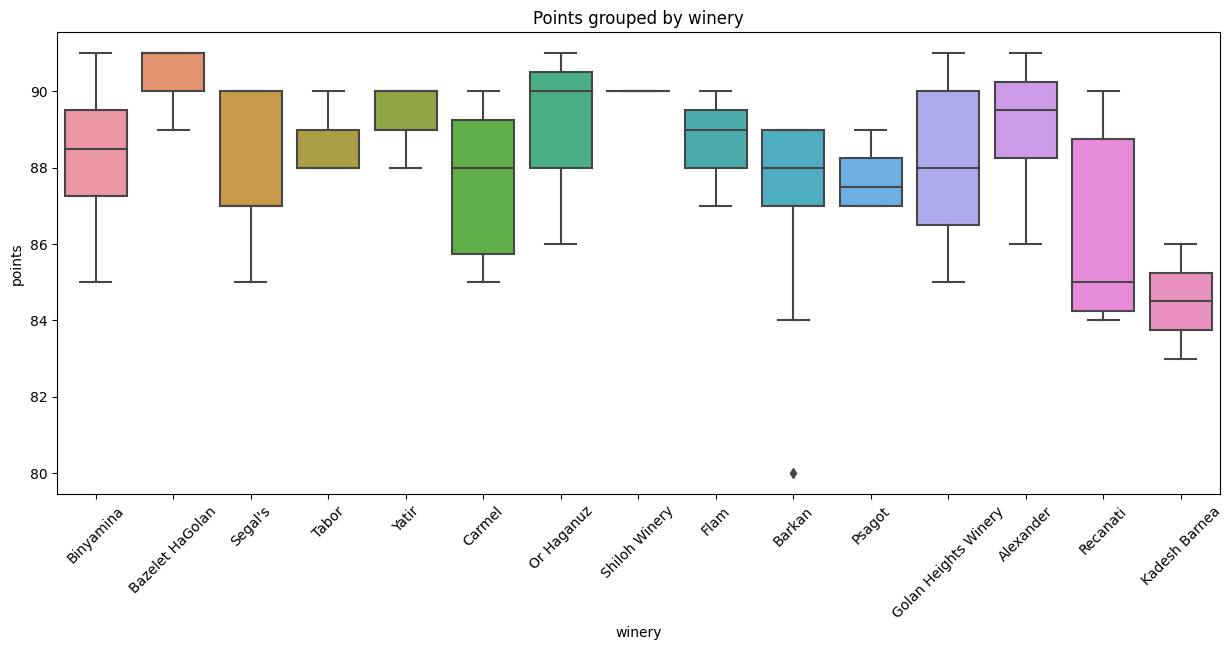

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (15, 6))
sns.boxplot(israeli_wines, y='points', x='winery')
plt.xticks(rotation=45)
plt.title("Points grouped by winery")
plt.show(fig)

3.

In [57]:
from scipy.stats import f

grouped = israeli_wines.loc[:, ['points', 'winery']].groupby('winery')
all_values_per_winery = grouped.points.apply(list)

y_i_s = grouped.sum() / grouped.count()
y_mean = np.sum(grouped.count() * y_i_s) / grouped.count().sum()

SS_between = np.sum(grouped.count() * (y_i_s - y_mean)**2)[0]
SS_within = np.sum([np.sum((all_values_per_winery[winery] - y_i_s.loc[winery].values[0])**2) for winery in y_i_s.index])
SS_tot = SS_between + SS_within

groups_DoF = len(y_i_s.index) - 1
error_DoF = israeli_wines.shape[0] - len(y_i_s.index)
total_DoF = groups_DoF + error_DoF

MS_between = SS_between/groups_DoF
MS_within = SS_within/error_DoF

F = MS_between / MS_within

p_value = f.sf(F, groups_DoF, error_DoF)

In [58]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Source", "DoF", "SS", "MS", "F", "p_value"]


table.add_row(["Groups", f"{groups_DoF}", f"{SS_between:.4f}", f"{MS_between:.4f}", f"{F:.4f}", f"p_value = {p_value:7f}"])
table.add_row(["Error", f"{error_DoF}", f"{SS_within:.4f}", f"{MS_within:.4f}", "", ""])
table.add_row(["Total", f"{total_DoF}", f"{SS_tot:.4f}", "", "", ""])

print(table)

+--------+-----+----------+--------+--------+--------------------+
| Source | DoF |    SS    |   MS   |   F    |      p_value       |
+--------+-----+----------+--------+--------+--------------------+
| Groups |  14 | 106.6825 | 7.6202 | 1.5944 | p_value = 0.108376 |
| Error  |  58 | 277.2079 | 4.7794 |        |                    |
| Total  |  72 | 383.8904 |        |        |                    |
+--------+-----+----------+--------+--------+--------------------+


  Since our p_value is not small we can't reject the hypothesis, meaning all winaries make the same cabernets. 

4.

In [10]:
def pair_t_test(winery1, winery2):
    n_0 = len(winery1)
    n_1 = len(winery2)
    mu_0 = np.mean(winery1)
    mu_1 = np.mean(winery2)
    DoF = n_0 + n_1 - 2
    s = ((np.sum((winery1 - mu_0) ** 2) + np.sum((winery2 - mu_1) ** 2)) / DoF) ** 0.5

    num = mu_1 - mu_0
    denom = s * ((1 / n_0) + (1 / n_1)) ** 0.5
    t = num / denom

    return t, DoF

In [11]:
from itertools import combinations
from scipy.stats import t

p_values = []

pairs = combinations(y_i_s.index, r = 2)
pairs = [(i, j) for i,j in pairs]
for winery1, winery2 in pairs:
    w_1 = all_values_per_winery[winery1]
    w_2 = all_values_per_winery[winery2]
    t_value, DoF = pair_t_test(w_1, w_2)
    p_value = t.sf(abs(t_value), DoF)
    p_values.append(p_value)

alpha = 0.05
p_values_below_alpha = [p_values for p_value in p_values if p_value < alpha / 2]

val = 'more' if len(p_values_below_alpha)*100 /len(p_values) > alpha else 'less'
print(f'{len(p_values_below_alpha)} out of {len(p_values)} p_values are below {alpha}, {len(p_values_below_alpha)*100 /len(p_values):.2f}%, which is {val} than expected')

8 out of 105 p_values are below 0.05, 7.62%, which is more than expected


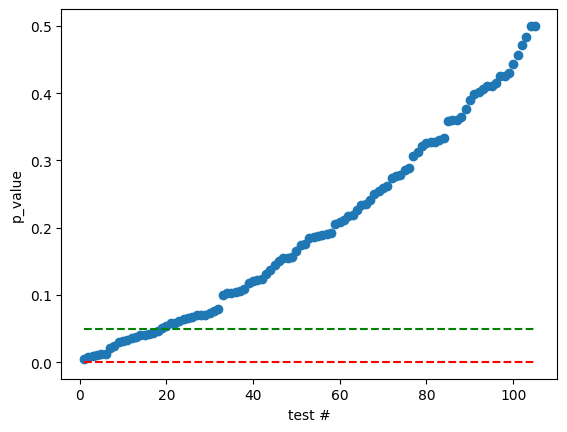

Discovered by Bonferroni:


[]

In [12]:
indeces = np.argsort(p_values)
sorted_p_values = np.array(p_values)[indeces]

plt.scatter(np.arange(1,len(p_values)+1), sorted_p_values)

m = len(p_values)
# Discoveries by Bonferroni's:
alpha = 0.05
plt.plot([1, m], [alpha / m, alpha / m], '--r')
plt.plot([1, m], [alpha, alpha], '--g')
plt.ylabel('p_value')
plt.xlabel('test #')
plt.show()

# Discoveries by BH:
rejected = sorted_p_values * len(sorted_p_values) < .05

print("Discovered by Bonferroni:")
[pairs[i] for i in indeces[rejected]]

## Problem 5 (contrasts)
#### Continuation of Problem 4

Load the data as in Question 4 (removing duplicates, leaving only samples from winaries of at least 3 samples of variety ``Cabernet Sauvignon``)

Using a single t-test, test the assumption that cabernets in the Golan area wineries: ``Bazelet HaGolan``, ``Golan Heights Winery`` have the same quality as the average of Judean Hills area wineries: ``Katlav``, ``Psagot``, ``Shiloh Winery``, ``Titora``, ``Yatir`` (the goal here is to construct a "contrast", hence you should take an arithmetic average of group averages. Recall that the global vriance estimator is obtained using all data points, not just those involved in the contrast).

Note: you can ignore the ``province`` filed in the data becasue it contains inaccurate information.



In [85]:
Golan_wineries = ['Bazelet HaGolan', 'Golan Heights Winery']
Judean_wineries = ['Katlav', 'Psagot', 'Shiloh Winery', 'Titora', 'Yatir']

Golan_wineries_df = israeli_wines.loc[israeli_wines['winery'].isin(Golan_wineries), ['points', 'winery']]
Judean_wineries_df = israeli_wines.loc[israeli_wines['winery'].isin(Judean_wineries), ['points', 'winery']]

grouped_Golan = Golan_wineries_df.groupby('winery')
grouped_Judean = Judean_wineries_df.groupby('winery')

all_values_Golan_wineries = grouped_Golan.points.apply(list)
all_values_Judean_wineries = grouped_Judean.points.apply(list)

means_Golan = grouped_Golan.sum()/grouped_Golan.count()
means_Judean = grouped_Judean.sum()/grouped_Judean.count()

s = MS_within ** 0.5

num = np.sum(means_Golan)/means_Golan.shape[0] - np.sum(means_Judean)/means_Judean.shape[0]
denum = s * (((1/(len(means_Golan)**2)) * np.sum(1/grouped_Golan.count())[0]) +\
             ((1/(len(means_Judean)**2)) * np.sum(1/grouped_Judean.count())[0])) ** 0.5

t_statistic = num/denum
p_value = t.sf(abs(t_statistic), israeli_wines.shape[0] - (len(means_Golan) + len(means_Judean)))

alpha = 0.05
val = "reject" if p_value < alpha/2 else "can't reject"
print(f'We {val} the hypothesis that Golan area wineries have the same quality as Judean area wineries (based on points)\n'
      f'with alpha = {alpha} and p-value = {p_value[0]}')

We can't reject the hypothesis that Golan area wineries have the same quality as Judean area wineries (based on points)
with alpha = 0.05 and p-value = 0.419214253746327
